In [39]:
import numpy as np

In [40]:
from scipy.stats import norm
import matplotlib.pyplot as plt

In [41]:
def plot_distribution(ax, pdfs, title=''): 
    x = np.linspace(0., 10., 200)
    ymax = 0    
    for index, pdf in enumerate(pdfs):
        y = norm.pdf(x, pdf.mean, np.sqrt(pdf.var))

        p = ax.plot(x, y, lw = 2)
        c = p[0].get_markeredgecolor()    
        ax.fill_between(x, y, 0, color=c, alpha=0.2 )    
        ax.autoscale(tight=True)
        ax.vlines(pdf.mean, 0, y.max(), colors = c, linestyles = "--", lw = 2)    

        ymax = max( ymax, y[1:].max()*1.05 )
    ax.set_ylim([0,ymax])

def plot_regret(ax, regret, title=''): 
    ax.plot(regret)

def plot(regret, mab):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    plot_regret(axs[0], regret)
    plot_distribution(axs[1], mab)

In [42]:
class Arm:
    def __init__(self, mean, var):
        self.mean = mean
        self.var = var

    def sample(self):
        return np.random.normal(self.mean, np.sqrt(self.var))

    def name(self):
        return 'N(' + str(self.mean) + ',' + str(self.var) + ')'

# Thompson Sampling

In this exercise we will run thompson sampling for 2-armed bandit with gaussian distribution.
For simplicity assume we know variance of distribution of arms and only mean is unknown
for prior assume gaussian distribution.

## 1.
if variance was unknown what prior distribtion would be suitable?

### Answer:
If the variance and mean are both unknown, a Normal-Inverse Gamma distribution would be suitable. (in the Multivariate case we can use Normal-Inverse Wishart).

## 2.
Implement Thompson Sampling algorithm. For comparison also implement ϵ-Greedy and UCB algorithms

In [ ]:
class ThompsonSampling:
    def __init__(self, var_list):
        """
        variance of arms are known to policy
        """
        #assuming N(0, std) for both arms' means as prior
        self._means = np.ones(2)
        self._vars = var_list
        self.num_list = np.zeros(2)
        self.Q = np.zeros(2)
        self.rewards = [[], []]
        self.tau = 0.001 * np.ones(2)
        

    def select_arm(self, *args):
        # ==================================== Your Code (Begin) ==================================
        
        # select arm based on estimate of prior distribution
        samples = [np.random.normal(self._means[idx], np.sqrt(1/self.tau[idx])) for idx in range(2)]

        # return index of selected arm
        return np.argmax(samples)
        # ==================================== Your Code (End) ====================================
        

    def update(self, idx, reward):
        # ==================================== Your Code (Begin) ==================================
        
        # update prior based on reward
        self.num_list[idx] += 1
        self.rewards[idx].append(reward)
        self.Q[idx] = sum(self.rewards[idx])
        #self._means[idx] = (self.Q[idx]+self._means[idx])/()
        
        self._means[idx] = (1/self._vars[idx] * self.Q[idx] + self.tau[idx] * self._means[idx])/(self.tau[idx] + self.num_list[idx]/self._vars[idx])
        self.tau[idx] += self.num_list[idx] / self._vars[idx]
        
        #print(self._means[idx])
        # ==================================== Your Code (End) ====================================

In [ ]:
class ThompsonSampling:
    def __init__(self, var_list):
        """
        variance of arms are known to policy
        """
        #assuming N(0, std) for both arms' means as prior
        self._means = np.ones(2)
        self._vars = var_list
        self.num_list = np.zeros(2)
        self.Q = np.zeros(2)
        self.rewards = [[], []]
        self.tau = 0.001 * np.ones(2)
        

    def select_arm(self, *args):
        # ==================================== Your Code (Begin) ==================================
        
        # select arm based on estimate of prior distribution
        samples = [np.random.normal(self._means[idx], np.sqrt(1/self.tau[idx])) for idx in range(2)]

        # return index of selected arm
        return np.argmax(samples)
        # ==================================== Your Code (End) ====================================
        

    def update(self, idx, reward):
        # ==================================== Your Code (Begin) ==================================
        
        # update prior based on reward
        self.num_list[idx] += 1
        self.rewards[idx].append(reward)
        self.Q[idx] = sum(self.rewards[idx])
        #self._means[idx] = (self.Q[idx]+self._means[idx])/()
        
        self._means[idx] = (1/self._vars[idx] * self.Q[idx] + self.tau[idx] * self._means[idx])/(self.tau[idx] + self.num_list[idx]/self._vars[idx])
        self.tau[idx] += self.num_list[idx] / self._vars[idx]
        
        #print(self._means[idx])
        # ==================================== Your Code (End) ====================================

In [ ]:
class UCB:    
    def __init__(self, n_bandits, c_level):
        """
        c_level: coefficient of uncertainty
        """
        self.num_list = np.zeros(n_bandits)
        self.Q = np.zeros(n_bandits)
        self.C = c_level
        self.time_step = 1
    
    def select_arm(self):
        # ==================================== Your Code (Begin) ==================================
        
        # select arm based on UCB
        confidence = np.sqrt(2*np.log(self.time_step)/(self.num_list + 1e-6))
        arm = np.argmax(self.Q + self.C * confidence)

        # return index of selected arm
        self.time_step += 1
        return arm
        # ==================================== Your Code (End) ====================================

    def update(self, idx, reward):
        # ==================================== Your Code (Begin) ==================================
        
        # update based on reward
        self.num_list[idx] += 1
        self.Q[idx] += 1/self.num_list[idx] * (reward - self.Q[idx])
        # ==================================== Your Code (End) ====================================

In [ ]:
class eGreedy:    
    def __init__(self, n_bandits, epsilon):
        """
        epsilon must be given
        """
        self.eps = epsilon
        self.n_bandits = n_bandits
        self.num_list = np.zeros(n_bandits)
        self.Q = np.zeros(n_bandits)
        
    
    def select_arm(self, *args):
        # ==================================== Your Code (Begin) ==================================
        
        # select arm based on e-Greedy
        if np.random.uniform(0,1) > self.eps:
          arm = np.argmax(self.Q)
        else:
          arm = np.random.randint(0, self.n_bandits)

        # return index of selected arm
        return arm
        # ==================================== Your Code (End) ====================================
        

    def update(self, idx, reward):
        # ==================================== Your Code (Begin) ==================================
        
        # update based on reward
        self.num_list[idx] += 1
        self.Q[idx] += 1/self.num_list[idx] * (reward - self.Q[idx])
        # ==================================== Your Code (End) ====================================

## 3
run simulation for arms described as cells below and describe the differences of regret with different variance in arms distributions

rum_sim1 must return cumulitive regret formulated as 
$$
R(T)=\sum_{i=1}^2 N_i(T) \Delta_i
$$

where $N_i(T)$ is number of times arm $i$ was selected until step $T$, $\Delta_i=\mu^*-\mu_i$, $\mu^*$ is largest mean in arms distribtions and $\mu_i$ is mean of distribution of arm $i$

to get average regret we rum simulation 50 times.

In [ ]:
def run_sim1(policy, mab, step_num=100):
    """
    run simulation of multi-armed bandit
    mab: list of arms
    """
    best_mean = np.max([b.mean for b in mab])
    regret = []
    for k in range(step_num):          
        # ==================================== Your Code (Begin) ==================================
        
        # run policy algorithm and return cumulative regret
        idx = policy.select_arm()
        reward = mab[idx].sample()
        policy.update(idx, reward)
        delta = np.array([best_mean - [b.mean for b in mab]])
        reg = np.dot(np.reshape(policy.num_list, (1,2)), delta.T)
        regret.append(reg)
        # ==================================== Your Code (End) ====================================
        
    return regret

### 3.1
Assume Multi-Armed Bandit variables are as follows.

In [ ]:
mab = [Arm(6, 0.5), Arm(4, 0.5)]

#### Thompson Sampling
run and describe the result.

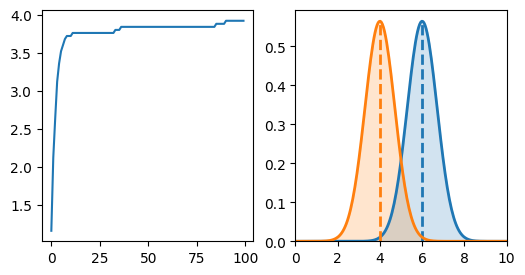

In [ ]:
regret = [run_sim1(ThompsonSampling([b.var for b in mab]), mab) for _ in range(50)]
regret = np.reshape(np.array(regret), (50, 100))
plot(np.mean(regret, axis=0), mab)

#### ϵ-Greedy
run for different values of ϵ and compare results.

epsilon (in order)= [0.01, 0.05, 0.1, 0.3, 0.5]


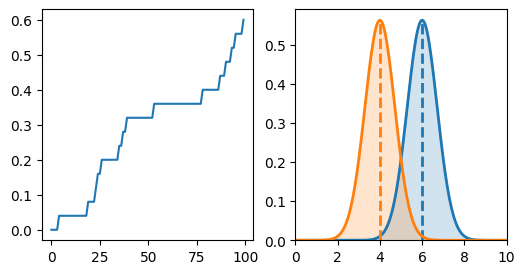

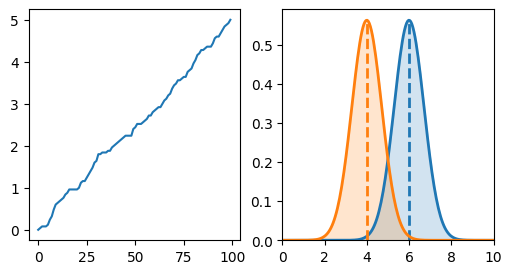

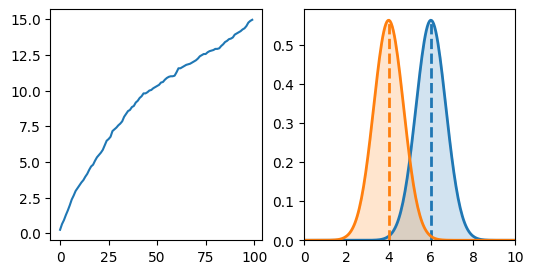

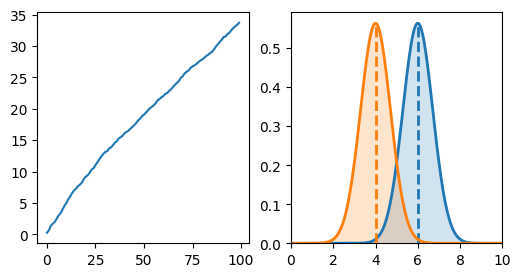

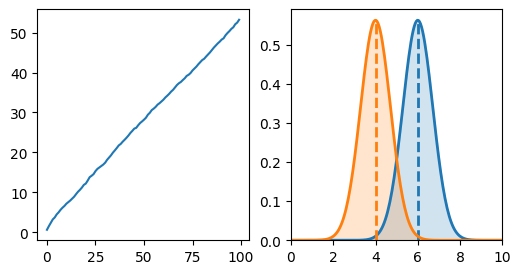

In [ ]:
epsilon = [0.01, 0.05, 0.1, 0.3, 0.5]
print(f"epsilon (in order)= {epsilon}")
for eps in epsilon:
  regret = [run_sim1(eGreedy(2, epsilon=eps), mab) for _ in range(50)]
  regret = np.reshape(np.array(regret), (50, 100))
  plot(np.mean(regret, axis=0), mab)

#### UCB
run for different values of confidence level and compare results.


epsilon (in order)= [0.01, 0.05, 0.1, 0.3, 0.5]


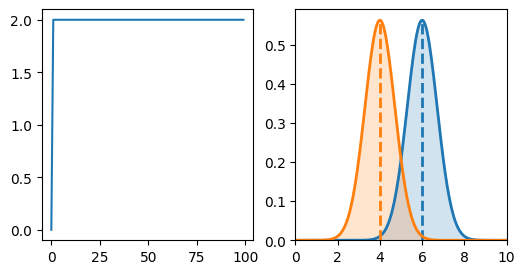

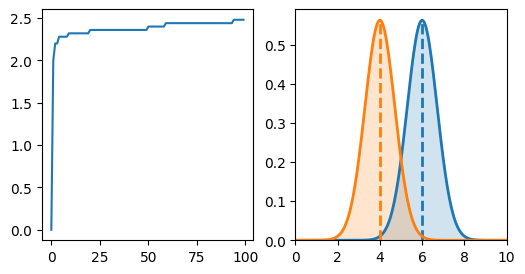

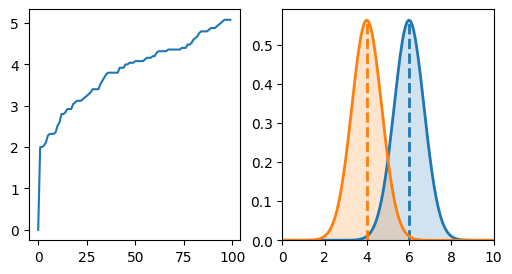

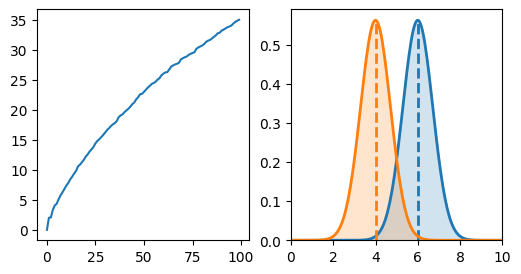

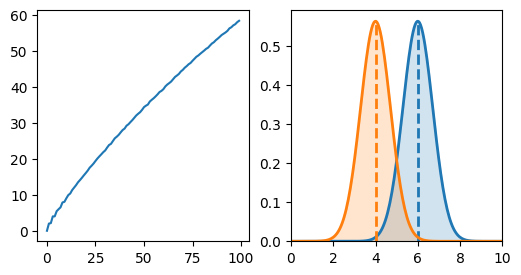

In [ ]:
c_level = [0.1, 0.5, 1, 5, 10]
print(f"epsilon (in order)= {epsilon}")
for c in c_level:
  regret = [run_sim1(UCB(2, c_level=c), mab) for _ in range(50)]
  regret = np.reshape(np.array(regret), (50, 100))
  plot(np.mean(regret, axis=0), mab)

### 3.2
Assume Multi-Armed Bandit variables are as follows.

In [ ]:
mab = [Arm(6, 10), Arm(4, 10)]

#### Thompson Sampling
run and compare results.

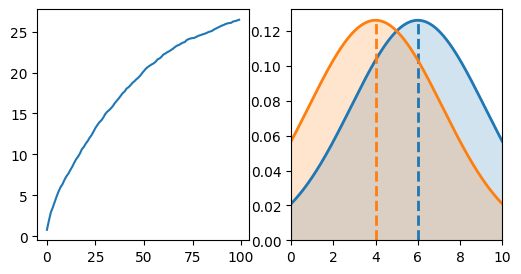

In [ ]:
regret = [run_sim1(ThompsonSampling([b.var for b in mab]), mab) for _ in range(50)]
regret = np.reshape(np.array(regret), (50, 100))
plot(np.mean(regret, axis=0), mab)

#### ϵ-Greedy
run for different values of ϵ and compare results.

epsilon (in order)= [0.01, 0.05, 0.1, 0.3, 0.5]


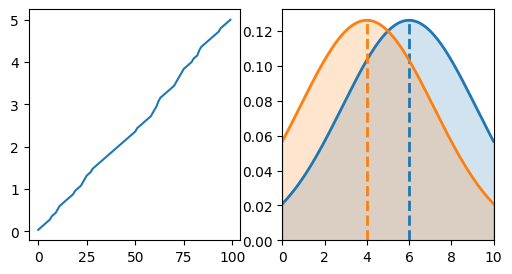

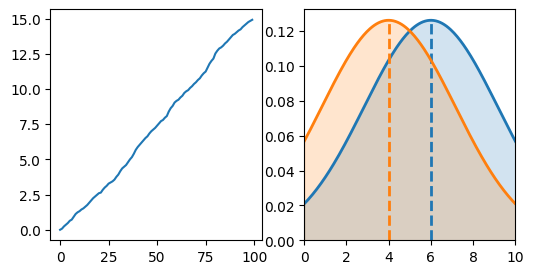

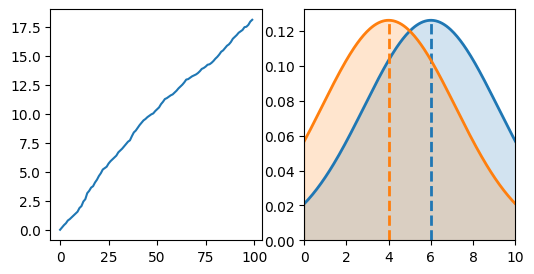

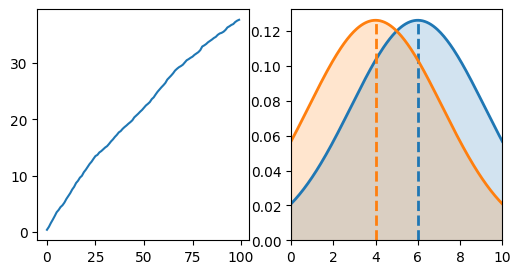

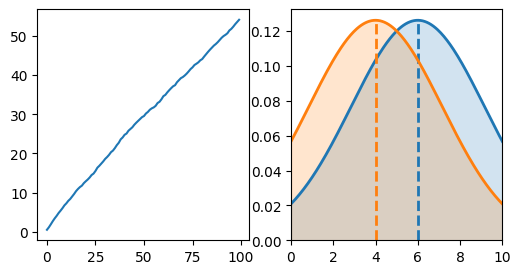

In [ ]:
epsilon = [0.01, 0.05, 0.1, 0.3, 0.5]
print(f"epsilon (in order)= {epsilon}")
for eps in epsilon:
  regret = [run_sim1(eGreedy(2, epsilon=eps), mab) for _ in range(50)]
  regret = np.reshape(np.array(regret), (50, 100))
  plot(np.mean(regret, axis=0), mab)

#### UCB
run for different values of confidence level and compare results.

epsilon (in order)= [0.01, 0.05, 0.1, 0.3, 0.5]


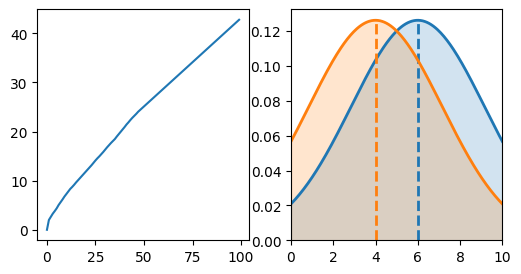

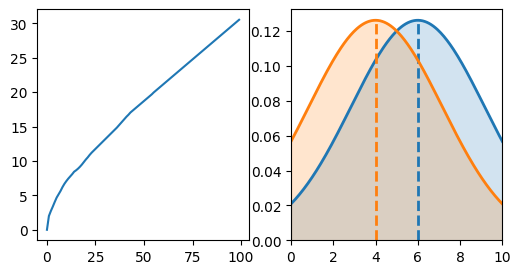

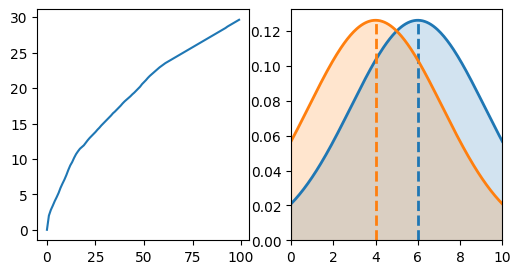

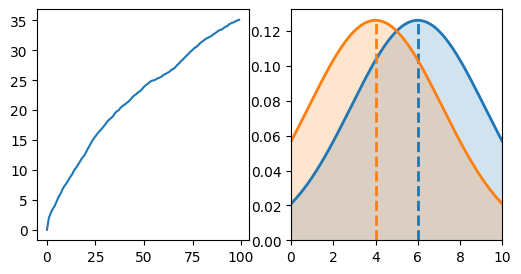

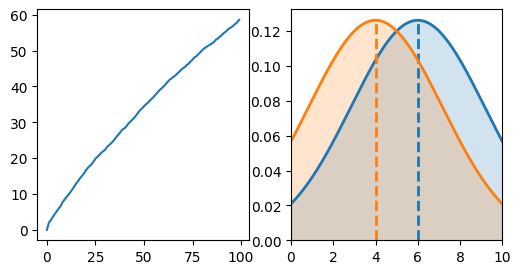

In [ ]:
c_level = [0.1, 0.5, 1, 5, 10]
print(f"epsilon (in order)= {epsilon}")
for c in c_level:
  regret = [run_sim1(UCB(2, c_level=c), mab) for _ in range(50)]
  regret = np.reshape(np.array(regret), (50, 100))
  plot(np.mean(regret, axis=0), mab)

## 4
simulation below assumes a non-stationary multi-armed bandit. specifically in this simulation mean value of distribution of first arm changes in step 100. describe the result of thompson sampling.

In [46]:
def run_sim2(ts, mab, step_num=500, change_step=100):
    init_mean = mab[0].mean
    best_mean = np.max([b.mean for b in mab])
    regret = []
    for i in range(step_num):
        if i == change_step:
            mab[0].mean = 2
            best_mean = np.max([b.mean for b in mab])
            
                  
        # ==================================== Your Code (Begin) ==================================
        
        # run tompson sampling algorithm and return cumulative regret
        idx = ts.select_arm()
        reward = mab[idx].sample()
        ts.update(idx, reward)
        delta = np.array([best_mean - [b.mean for b in mab]])
        reg = np.dot(np.reshape(ts.num_list, (1,2)), delta.T)
        regret.append(reg)
        
        # ==================================== Your Code (End) ====================================
    mab[0].mean = init_mean
    return regret

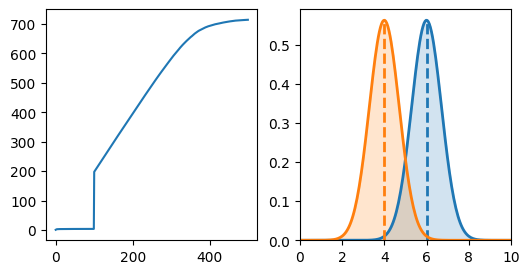

In [ ]:
mab = [Arm(6, 0.5), Arm(4, 0.5)]
regret = [run_sim2(ThompsonSampling([b.var for b in mab]), mab) for _ in range(50)]
regret = np.reshape(np.array(regret), (50, 500))
plot(np.mean(regret, axis=0), mab)

### 4.1
change thompson sampling algorithm to improve results in non-stationary MAB.

In [55]:
class NewThompsonSampling:
    def __init__(self, var_list, buffer_size=30, **kwargs):
        self.var_list = var_list
        self.buffer_size = buffer_size
        self.num_list = np.zeros(len(var_list))
        self._means = np.ones(2)
        self.rewards_buffer = [[],[]]

    def select_arm(self, *args):
        # ==================================== Your Code (Begin) ==================================
        
        # select arm based on estimate of prior distribution
        samples = [np.random.normal(self._means[idx], np.sqrt(self.var_list[idx])) for idx in range(len(self.var_list))]

        # return index of selected arm
        return np.argmax(samples)
        # ==================================== Your Code (End) ====================================


    def update(self, idx, reward):
        # ==================================== Your Code (Begin) ==================================
        
        self.rewards_buffer[idx].append(reward)
        self.num_list[idx] += 1

        #obtain the last 'buffer_size' rewards for each arm only
        if len(self.rewards_buffer[idx]) > self.buffer_size:
          self.rewards_buffer[idx] = self.rewards_buffer[idx][-self.buffer_size:]

        #avoid division by zero
        curr_len = len(self.rewards_buffer[idx])
        if curr_len == 1:
            self._means[idx] = reward
            self.var_list[idx] = 0.0

        else:
            self._means[idx] += (reward - self.rewards_buffer[idx][0]) / curr_len
            self.var_list[idx] = 1/(curr_len - 1) * ((curr_len - 2) * self.var_list[idx] + (reward - self.rewards_buffer[idx][0]) ** 2)
        # ==================================== Your Code (End) ====================================

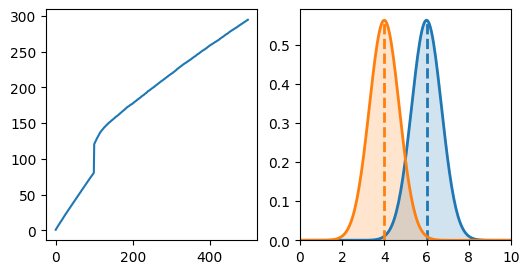

In [56]:
mab = [Arm(6, 0.5), Arm(4, 0.5)]
regret = [run_sim2(NewThompsonSampling([b.var for b in mab]), mab) for _ in range(50)]
regret = np.reshape(np.array(regret), (50, 500))
plot(np.mean(regret, axis=0), mab)